In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_csv('../X_Y_merged.csv')

import pandas as pd

df.head()



,CompNo,yyyy,mm,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,sigma,liqfinlevel,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin,EventDate,Event_type,Sector_Number,Exchange
0,15984,1999,3,0.167570,0.006248,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2.324205,0,199903,0,12.0,15
1,15984,1999,4,0.200972,0.006487,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,2.373554,0,199904,2,17.0,15
2,15984,1999,6,0.210673,0.007457,NaN,NaN,0.447325,0.000000e+00,0.00932,...,0.276896,0.0,0.0,0.0,2.455890,0,199906,2,12.0,15
3,15984,1999,9,0.261256,0.007744,4.779150,0.100454,0.447325,0.000000e+00,0.00932,...,0.238643,0.0,0.0,0.0,2.499298,0,199909,2,99.0,15
4,15984,2000,1,0.089239,0.011089,4.966794,-0.019877,0.447325,-5.551115e-17,0.00932,...,0.219866,0.0,0.0,0.0,2.630245,0,200001,2,19.0,15


In [16]:
# Assuming your DataFrame is named df
df['transformed_status'] = df['Event_type']
df['transformed_year'] = df['yyyy'].apply(lambda x: x - 1999)


0         0
1         0
2         0
3         0
4         1
         ..
12559    20
12560    20
12561    20
12562    20
12563    20
Name: transformed_year, Length: 12564, dtype: int64

c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  

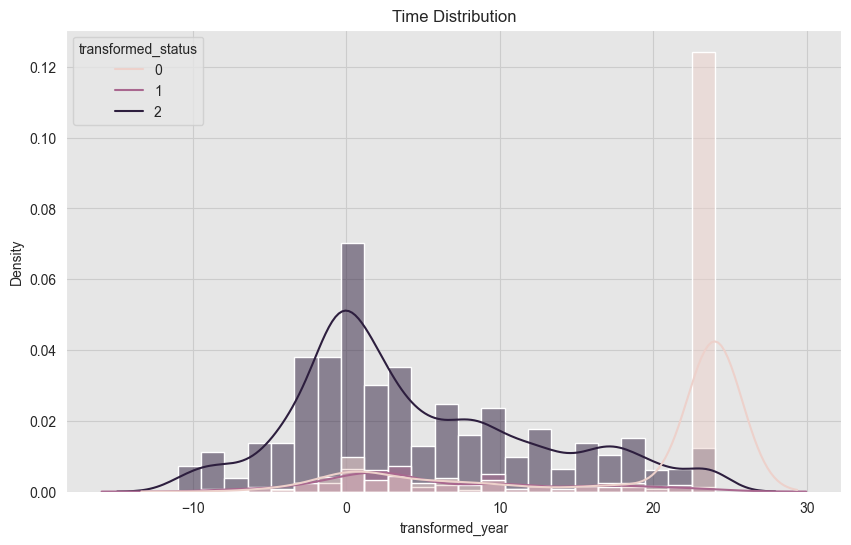

In [10]:
fig, ax = plt.subplots()
sns.histplot(x='transformed_year', data=df, hue='transformed_status', stat='density', ax=ax)
sns.kdeplot(x='transformed_year', data=df, hue='transformed_status', fill=False, ax=ax)
ax.set(title='Time Distribution');

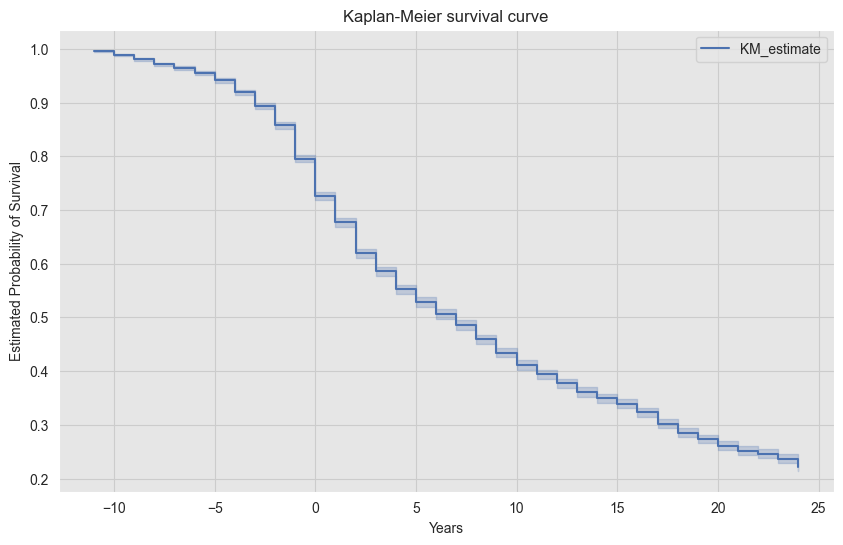

In [11]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['transformed_year'], event_observed=df['transformed_status'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Years',
    ylabel='Estimated Probability of Survival'
);

In [20]:
features_to_drop = ['CompNo','yyyy','mm','EventDate','Sector_Number','Exchange']
# engineering numeric columns for Cox Proportional Hazard estimation
df_new = df.drop(features_to_drop, axis=1).copy()
df_new.dropna(inplace=True)
df_new

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,m2b,sigma,liqfinlevel,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin,Event_type,transformed_status,transformed_year
3,0.261256,0.007744,4.779150,0.100454,0.447325,0.000000e+00,0.009320,0.000000,1.352565,0.110965,6.072565,0.238643,0.0,0.0,0.0,2.499298,0,2,2,0
4,0.089239,0.011089,4.966794,-0.019877,0.447325,-5.551115e-17,0.009320,0.000000,1.346919,-0.030342,5.561975,0.219866,0.0,0.0,0.0,2.630245,0,2,2,1
5,0.089239,0.011089,4.966794,-0.019877,0.447325,-5.551115e-17,0.009320,0.000000,1.346919,-0.030342,5.561975,0.219866,0.0,0.0,0.0,2.630245,0,1,1,1
6,0.089239,0.011089,4.966794,-0.019877,0.447325,-5.551115e-17,0.009320,0.000000,1.346919,-0.030342,5.561975,0.219866,0.0,0.0,0.0,2.630245,0,2,2,1
7,0.102594,0.011443,4.754132,-1.488637,0.447325,0.000000e+00,0.009320,0.000000,1.354864,0.087397,6.383308,0.277813,0.0,0.0,0.0,2.670099,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,0.058265,-0.003351,2.220454,0.564582,0.129044,-2.534751e-01,-0.000929,-0.002708,0.350263,0.534307,1.303368,0.170275,0.0,0.0,0.0,3.748624,0,2,2,20
12560,0.058265,-0.003351,2.220454,0.564582,0.129044,-2.534751e-01,-0.000929,-0.002708,0.350263,0.534307,1.303368,0.170275,0.0,0.0,0.0,3.748624,0,2,2,20
12561,0.008731,-0.003690,2.283961,0.581200,0.097120,-2.263749e-01,-0.000786,-0.001401,0.424490,0.509180,1.347469,0.166429,0.0,0.0,0.0,3.537090,0,2,2,20
12562,0.008731,-0.003690,2.283961,0.581200,0.097120,-2.263749e-01,-0.000786,-0.001401,0.424490,0.509180,1.347469,0.166429,0.0,0.0,0.0,3.537090,0,2,2,20


In [22]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

cph.fit(df_new, duration_col='transformed_year', event_col='transformed_status', show_progress=False)
cph.print_summary()

c:\Documents\Capstone\.venv\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt', 'ni2talevel', 'ni2tatrend'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 12000 total observations, 3267 right-censored observations>
             duration col = 'transformed_year'
                event col = 'transformed_status'
      baseline estimation = breslow
   number of observations = 12000
number of events observed = 8733
   partial log-likelihood = -69356.79
         time fit was run = 2023-09-06 12:28:13 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
StkIndx           2.15       8.55       0.08             2.00             2.30                 7.36                 9.93
STInt            54.26   3.67e+23       1.51            51.30            57.22             1.91e+22             7.05e+24
dtdlevel         -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
dtdtrend         -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
liqnonfinlevel   -0.29       0.75       0.03            -0.34            -0.24                 0.71                 0.79
liqnonfintrend   -0.01       0.99       0.08            -0.17             0.15                 0.85                 1.16
ni2talevel        5.71     301.40       1.10             3.55             7.87                34.67              2619.92
ni2tatrend        1.93       6.92       1.33            -0.67             4.54                 0.51                94.00
sizelevel        -0.11       0.90       0.01            -0.12            -0.09                 0.89                 0.91
sizetrend        -0.50       0.61       0.05            -0.59            -0.40                 0.55                 0.67
m2b               0.03       1.03       0.01             0.01             0.05                 1.01                 1.05
sigma             1.10       3.01       0.22             0.66             1.54                 1.94                 4.67
liqfinlevel      -0.12       0.88       0.02            -0.16            -0.09                 0.86                 0.91
lqfintrend        0.08       1.08       0.04            -0.01             0.17                 0.99                 1.18
DTDmedianFin     -0.45       0.64       0.02            -0.50            -0.40                 0.61                 0.67
DTDmedianNonFin  -0.54       0.58       0.02            -0.58            -0.50                 0.56                 0.60
dummy297fin      -0.82       0.44       0.10            -1.02            -0.63                 0.36                 0.53
Event_type        2.12       8.31       0.03             2.06             2.17                 7.87                 8.77

                  cmp to      z      p   -log2(p)
covariate                                        
StkIndx             0.00  28.02 <0.005     571.66
STInt               0.00  35.98 <0.005     939.32
dtdlevel            0.00  -0.50   0.62       0.69
dtdtrend            0.00  -1.20   0.23       2.12
liqnonfinlevel      0.00 -11.13 <0.005      93.15
liqnonfintrend      0.00  -0.12   0.91       0.14
ni2talevel          0.00   5.17 <0.005      22.06
ni2tatrend          0.00   1.45   0.15       2.78
sizelevel           0.00 -15.95 <0.005     187.76
sizetrend           0.00  -9.84 <0.005      73.48
m2b                 0.00   3.15 <0.005       9.25
sigma               0.00   4.93 <0.005      20.18
liqfinlevel         0.00  -8.08 <0.005      50.40
lqfintrend          0.00   1.82   0.07       3.87
DTDmedianFin        0.00 -17.99 <0.005     237.96
DTDmedianNonFin     0.00 -29.06 <0.005     614.21
dummy297fin         0.00  -8.26 <0.005      52.62
Event_type          0.00  77.03 <0.005        inf
---
Concordance = 0.85
Partial AIC = 138749.59
log-likelihood ratio test = 14971.01 on 18 df
-log2(p) of ll-ratio test = inf

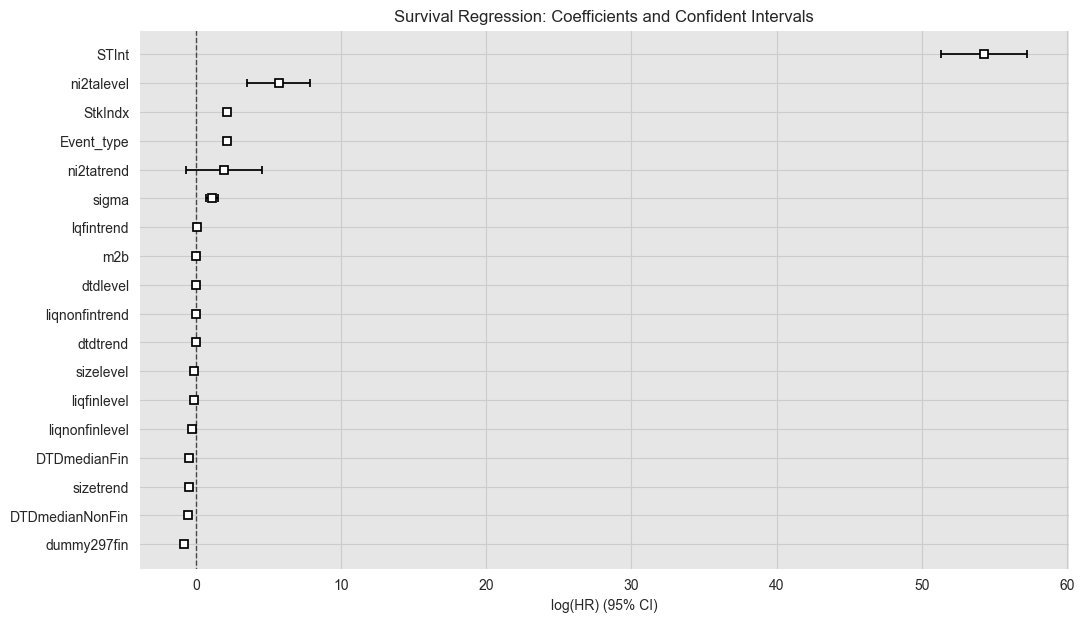

In [23]:
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);